# Superstore Churn 1.06: Feature Engineering

**Version 0.6**

by Linh Toan

[Data Science @ Newman University](https://newmanu.edu/academics/graduate-programs/ms-data-science)

# Import Libraries and Set Notebook Defaults

In [0]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Import libraries and packages for prediction and evaluation

# For creating train/test splits
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

# For the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# For evaluating a model's predictive performance
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, confusion_matrix

In [0]:
# Jupyter Notebook customizations

# Remove scientific notation from descriptive stats
pd.options.display.float_format = '{:,.3f}'.format

# Display all columns of a dataframe
pd.set_option('display.max_columns', None)

# Widen columns
pd.set_option('display.max_colwidth', 150)

In [0]:
# Customize Seaborn Plot Styles

# Adjust to retina quality
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# Adjust dpi and font size to support high-pixel-density screens
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook', font_scale = 0.8)

# Display tick marks
sns.set_style('ticks')

# Remove borders
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)

# Set color palettes for plots
# See Matplotlib named color options here: https://matplotlib.org/stable/gallery/color/named_colors.html
blue = 'deepskyblue' # Use 'skyblue' for a lighter blue
orange = 'orange'
cp1 = [blue, orange]

# cp2 Palette - Reversed binary color order when needed for certain plots
cp2 = [orange, blue]

# cp5 Palette - 5 colors for use with categorical data
turquoise = 'mediumaquamarine'
salmon = 'darksalmon'
tan = 'tan'
gray = 'darkgray'
cp5 = [blue, turquoise, salmon, tan, gray]

# cpd Palette - blue-to-orange diverging palette for correlation heatmaps
cpd = sns.diverging_palette(242, 39, s=100, l=65, n=11)

# Set the default palette
sns.set_palette(cp5)

# Read and Review Data

In [0]:
# Read from CSV
# Set appropriate data types

# Set file path
path = './data/Global_Superstore_Orders_2020_23.csv'

# Read data
# Set Postal Code datatype to string and fill to 5 digits with leading zeros
df = pd.read_csv(path, dtype={'Postal Code': str})

# Fill postal codes to 5 characters with leading zeros when needed
df['Postal Code'] = df['Postal Code'].str.zfill(5)

# Convert dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Make column names lowercase
df.columns = df.columns.str.lower()

# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(" ", "_")

df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,state,country,region,market,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2012-TB112803-40909,2020-01-01,2020-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",979.920,2,0.000,254.736,35.460,Medium
1,22253,IN-2012-JH159857-40909,2020-01-01,2020-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",288.878,3,0.100,86.486,9.720,Medium
2,48883,HU-2012-AT73557-40909,2020-01-01,2020-01-05,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",158.688,4,0.000,71.136,8.170,High
3,11731,IT-2012-EM14140124-40909,2020-01-01,2020-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",107.676,3,0.500,-62.532,4.820,High
4,22255,IN-2012-JH159857-40909,2020-01-01,2020-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",272.808,5,0.100,90.648,4.700,Medium


In [0]:
df.tail()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,state,country,region,market,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
51285,47594,MO-2015-LP709586-42369,2023-12-31,2024-01-05,Standard Class,LP-709586,Liz Preis,Consumer,NaN,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",9.576,1,0.000,1.008,1.490,Medium
51286,27700,IN-2015-KM1622527-42369,2023-12-31,2024-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,NaN,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",190.728,3,0.000,60.912,1.410,Medium
51287,8857,MX-2015-CM1219093-42369,2023-12-31,2024-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",63.360,3,0.000,29.664,1.350,Medium
51288,2143,MX-2015-JB1604582-42369,2023-12-31,2024-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,NaN,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",40.176,3,0.000,1.584,1.324,Medium
51289,6852,MX-2015-TD2099582-42369,2023-12-31,2024-01-06,Standard Class,TD-2099582,Tamara Dahlen,Consumer,NaN,Juárez,Chihuahua,Mexico,Central America,LATAM,OFF-LA-4664,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",17.088,1,0.000,1.344,1.199,Medium


In [0]:
# Get number of rows and columns
df.shape

(51290, 24)

In [0]:
# Dataframe fundamental info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          51290 non-null  int64         
 1   order_id        51290 non-null  object        
 2   order_date      51290 non-null  datetime64[ns]
 3   ship_date       51290 non-null  datetime64[ns]
 4   ship_mode       51290 non-null  object        
 5   customer_id     51290 non-null  object        
 6   customer_name   51290 non-null  object        
 7   segment         51290 non-null  object        
 8   postal_code     9994 non-null   object        
 9   city            51290 non-null  object        
 10  state           51290 non-null  object        
 11  country         51290 non-null  object        
 12  region          51290 non-null  object        
 13  market          51290 non-null  object        
 14  product_id      51290 non-null  object        
 15  ca

In [0]:
df.describe()

,row_id,sales,quantity,discount,profit,shipping_cost
count,"51,290.000","51,290.000","51,290.000","51,290.000","51,290.000","51,290.000"
mean,"25,645.500",591.577,3.477,0.143,68.666,26.479
std,"14,806.292","1,170.157",2.279,0.212,418.418,57.251
min,1.000,1.066,1.000,0.000,"-15,839.947",1.002
25%,"12,823.250",73.821,2.000,0.000,0.000,2.610
50%,"25,645.500",204.127,3.000,0.000,22.176,7.790
75%,"38,467.750",602.528,5.000,0.200,88.344,24.450
max,"51,290.000","54,332.352",14.000,0.850,"20,159.942",933.570


In [0]:
df.describe(include='object')

,order_id,ship_mode,customer_id,customer_name,segment,postal_code,city,state,country,region,market,product_id,category,sub-category,product_name,order_priority
count,51290,51290,51290,51290,51290,9994,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25728,4,17415,796,3,631,3650,1102,165,23,5,3788,3,17,3788,4
top,CA-2015-SV20365140-42268,Standard Class,SV-203651406,Muhammed Yedwab,Consumer,10035,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Office Supplies,Binders,Staples,Medium
freq,14,30775,26,108,26518,263,915,2001,9994,5883,14302,227,31289,6146,227,29433


# Feature Engineering

### Let's see if sales and profit are normally distributed, if not then we may need to do a logarithmic transformation. The goal is to process the data in a way to allow us to perform some statistical test for feature selection.

#### Might make things easier if we convert order_date to days from 2023-01-01, so that way we have that column as a numerical column.

In [0]:
# Convert 'order_date' column to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Compute the difference in days
df['days_since_2023'] = (df['order_date'] - pd.Timestamp('2023-01-01')) / pd.Timedelta(days=1)

cols_delete = ['row_id','order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment', 'city', 'state', 'country', 'region', 'postal_code', 'product_id', 'sub-category', 'product_name', 'order_priority']

df.drop(cols_delete, axis=1, inplace=True)


df.head()

,customer_id,market,category,sales,quantity,discount,profit,shipping_cost,days_since_2023
0,TB-112803,Africa,Office Supplies,979.920,2,0.000,254.736,35.460,"-1,096.000"
1,JH-159857,Asia Pacific,Office Supplies,288.878,3,0.100,86.486,9.720,"-1,096.000"
2,AT-73557,Europe,Office Supplies,158.688,4,0.000,71.136,8.170,"-1,096.000"
3,EM-14140124,Europe,Office Supplies,107.676,3,0.500,-62.532,4.820,"-1,096.000"
4,JH-159857,Asia Pacific,Furniture,272.808,5,0.100,90.648,4.700,"-1,096.000"


In [0]:
# Plot distribution of the Numerical columns
sales = go.Box(x=df.sales,name='Sales')
profit = go.Box(x=df.profit,name='Profit')

fig = make_subplots(rows=1, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(profit, row = 1, col = 2)

fig.update_layout(
    title_text = 'Distribution of the Sales and Profit data',
    title_font_size = 24,
    title_x=0.45)

fig.show()

#### Let's get rid of the outliers

In [0]:
df.drop(df[(df.sales > 3000)].index, inplace=True)
df.drop(df[(df.profit > 1500) | (df.profit < -400)].index, inplace=True)

In [0]:
sales = go.Box(x=df.sales,name='Sales')
profit = go.Box(x=df.profit,name='Profit')

fig = make_subplots(rows=1, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(profit, row = 1, col = 2)

fig.update_layout(
    title_text = 'Distribution of the Sales and Profit data with outliers removed',
    title_font_size = 24,
    title_x=0.45)

fig.show()

#### Profit is pretty normally distributed, but sales has a long tail so may need a logarithmic transformation.

In [0]:
df['sales_log'] = np.log1p(df.sales)
df.head()

,customer_id,market,category,sales,quantity,discount,profit,shipping_cost,days_since_2023,sales_log
0,TB-112803,Africa,Office Supplies,979.920,2,0.000,254.736,35.460,"-1,096.000",6.888
1,JH-159857,Asia Pacific,Office Supplies,288.878,3,0.100,86.486,9.720,"-1,096.000",5.669
2,AT-73557,Europe,Office Supplies,158.688,4,0.000,71.136,8.170,"-1,096.000",5.073
3,EM-14140124,Europe,Office Supplies,107.676,3,0.500,-62.532,4.820,"-1,096.000",4.688
4,JH-159857,Asia Pacific,Furniture,272.808,5,0.100,90.648,4.700,"-1,096.000",5.612


In [0]:
encode_cols = ['market', 'category']

# Apply one-hot encoding using get_dummies()
df_encoded = pd.get_dummies(df, columns=encode_cols)

df_encoded.head()

,customer_id,sales,quantity,discount,profit,shipping_cost,days_since_2023,sales_log,market_Africa,market_Asia Pacific,market_Europe,market_LATAM,market_USCA,category_Furniture,category_Office Supplies,category_Technology
0,TB-112803,979.920,2,0.000,254.736,35.460,"-1,096.000",6.888,1,0,0,0,0,0,1,0
1,JH-159857,288.878,3,0.100,86.486,9.720,"-1,096.000",5.669,0,1,0,0,0,0,1,0
2,AT-73557,158.688,4,0.000,71.136,8.170,"-1,096.000",5.073,0,0,1,0,0,0,1,0
3,EM-14140124,107.676,3,0.500,-62.532,4.820,"-1,096.000",4.688,0,0,1,0,0,0,1,0
4,JH-159857,272.808,5,0.100,90.648,4.700,"-1,096.000",5.612,0,1,0,0,0,1,0,0


#### Create churn variable based on whether the days_since_2023 value is less than 0, because that would mean the customer did not place an order in 2023. There is still the issue of a customer's order being in 2022 but then they order something in 2023 in another row. I will think of a solution later.

In [0]:
df_encoded['churn'] = df_encoded.days_since_2023.map(lambda x: int(x <= 0))
df_encoded.head()

,customer_id,sales,quantity,discount,profit,shipping_cost,days_since_2023,sales_log,market_Africa,market_Asia Pacific,market_Europe,market_LATAM,market_USCA,category_Furniture,category_Office Supplies,category_Technology,churn
0,TB-112803,979.920,2,0.000,254.736,35.460,"-1,096.000",6.888,1,0,0,0,0,0,1,0,1
1,JH-159857,288.878,3,0.100,86.486,9.720,"-1,096.000",5.669,0,1,0,0,0,0,1,0,1
2,AT-73557,158.688,4,0.000,71.136,8.170,"-1,096.000",5.073,0,0,1,0,0,0,1,0,1
3,EM-14140124,107.676,3,0.500,-62.532,4.820,"-1,096.000",4.688,0,0,1,0,0,0,1,0,1
4,JH-159857,272.808,5,0.100,90.648,4.700,"-1,096.000",5.612,0,1,0,0,0,1,0,0,1


#### Now let's try feature elimination for the lowest accuracy column(s)

In [0]:
numerical_columns = list(df_encoded.dtypes[df_encoded.dtypes != 'object'].index)

df_numerical = df_encoded[numerical_columns]

#### Split the dataset into training/validation/testing using a 60/20/20 split.

In [0]:
df_feat_elim = df_numerical.copy()
del df_feat_elim['days_since_2023']

df_full_train, df_test = train_test_split(df_feat_elim, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [0]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [0]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = model.predict(X_val)

accuracy = round(accuracy_score(y_val, y_pred), 2)
accuracy

0.66

In [0]:
# Report the accuracy, precision, and recall scores of the model

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100

print('RESULTS')
print(f'Accuracy: {accuracy}%')
print(f'Precision: {precision}%')
print(f'Recall: {recall}%')

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-3613365831286854>, line 3
      1 # Report the accuracy, precision, and recall scores of the model
----> 3 accuracy = accuracy_score(y_test, y_pred) * 100
      4 precision = precision_score(y_test, y_pred) * 100
      5 recall = recall_score(y_test, y_pred) * 100

File /databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:211, in accuracy_score(y_true, y_pred, normalize, sample_weight)
    145 """Accuracy classification score.
    146 
    147 In multilabel classification, this function computes subset accuracy:
   (...)
    207 0.5
    208 """
    210 # Compute accuracy for each possible representation
--> 211 y_type, y_true, y_pred = _check_targets(y_true, y_pred)
    212 check_consistent_length(y_true, y_pred, sample_weight)
    213 if y_type.startswith("multilabel"):

File /databricks/pyth

In [0]:
# Generate a better custom Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
# Normalize true, pred, or all
cm_norm = confusion_matrix(y_test, y_pred, normalize='all')
cm_colors = sns.color_palette(['gainsboro', 'cornflowerblue'])

# axis labels for the confusion matrix plot
cm_y_labels = ['0','1'] # column labels
cm_x_labels = ['0','1'] # row labels

# Confusion matrix labels
# Review and update to match the appropriate labels for your data set
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm_norm.flatten()]
group_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
group_labels = np.asarray(group_labels).reshape(2,2)

# Begin plot setup
fig, ax = plt.subplots(figsize=(4.2, 4.2))

# Heatmap
sns.heatmap(np.eye(2), annot=group_labels, annot_kws={'size': 11}, fmt='',
            cmap=cm_colors, cbar=False,
            yticklabels=cm_y_labels, xticklabels=cm_x_labels, ax=ax)

# Axis elements
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

# Position group labels and set colors
for text_elt, group_label in zip(ax.texts, group_labels):
    ax.text(*text_elt.get_position(), '\n', color=text_elt.get_color(),
            ha='center', va='top')

# Title for each plot
# Adjust pad to provide room for the score report below title and above confusion matrix plot
plt.title(f'{model}', pad=80, loc='left', fontsize=16, fontweight='bold')

# Score reports beneath each title
# Adjust x and y to fit report
plt.figtext(0.21, 0.81, f'{accuracy:.3f}%  Accuracy\n{precision:.3f}%  Precision\n{recall:.3f}%  Recall', wrap=True, ha='left', fontsize=10)

# Disply the plot!
plt.tight_layout()
plt.subplots_adjust(left=0.2)
print('\n') # Add a blank line for improved spacing
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-3613365831286855>, line 3
      1 # Generate a better custom Confusion Matrix
----> 3 cm = confusion_matrix(y_test, y_pred)
      4 # Normalize true, pred, or all
      5 cm_norm = confusion_matrix(y_test, y_pred, normalize='all')

File /databricks/python/lib/python3.10/site-packages/sklearn/metrics/_classification.py:307, in confusion_matrix(y_true, y_pred, labels, sample_weight, normalize)
    222 def confusion_matrix(
    223     y_true, y_pred, *, labels=None, sample_weight=None, normalize=None
    224 ):
    225     """Compute confusion matrix to evaluate the accuracy of a classification.
    226 
    227     By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
   (...)
    305     (0, 2, 1, 1)
    306     """
--> 307     y_type, y_true, y_pred = _check_targets(y_true, y_pred)
    308     if y_type

In [0]:
features_list = df_train.columns.values.tolist()

def feature_elimination(features):
    min_diff = {}

    for f in features:
        features_test = features.copy()
        features_test.remove(f)
        
        dv = DictVectorizer(sparse=False)
        train_dicts = df_train[features_test].to_dict(orient='records')
        X_train = dv.fit_transform(train_dicts)
        
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        
        val_dicts = df_val[features_list].to_dict(orient='records')
        X_val = dv.transform(val_dicts)
        y_pred = model.predict(X_val)
        
        score = round(accuracy_score(y_val, y_pred), 2)
        min_diff[f] = round(accuracy - score, 2)
        
        print(f'For {f}, the difference is {round(accuracy - score, 2)} and accuracy score is {score}')
        
    min_key = min(min_diff, key=min_diff.get)
    min_value = min_diff[min_key]
    ans = 'The feature with the smallest difference is {} with a difference of {}'.format(min_key, min_value)
    
    return ans

In [0]:
feature_elimination(features_list)

For sales, the difference is 0.0 and accuracy score is 0.6
For quantity, the difference is 0.0 and accuracy score is 0.6
For discount, the difference is 0.0 and accuracy score is 0.6
For profit, the difference is 0.02 and accuracy score is 0.58
For shipping_cost, the difference is 0.01 and accuracy score is 0.59
For sales_log, the difference is 0.0 and accuracy score is 0.6
For market_Africa, the difference is 0.0 and accuracy score is 0.6
For market_Asia Pacific, the difference is 0.0 and accuracy score is 0.6
For market_Europe, the difference is 0.0 and accuracy score is 0.6
For market_LATAM, the difference is 0.0 and accuracy score is 0.6
For market_USCA, the difference is 0.0 and accuracy score is 0.6
For category_Furniture, the difference is 0.0 and accuracy score is 0.6
For category_Office Supplies, the difference is 0.0 and accuracy score is 0.6
For category_Technology, the difference is -0.01 and accuracy score is 0.61


'The feature with the smallest difference is sales with a difference of 0.0'

## Add Target Variable: Churn

Define churn as whether or not the customer made a purchase during the most recent year of our data:

- If the customer's most recent order was during the most recent year, then churn = 0

- If the customer's most recent order was prior to the most recent year, then churn = 1

# Test Churn Prediction

Quickly test the quality of our feature engineering by creating predictions using an efficient and effective machine learning model:

The Random Forest Classifier from Scikit Learn

In [0]:
# Create a train / test split, with 30% of the data for test.

# Create X and y variables
X = df_feat_elim.copy()
y = df_feat_elim['churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# See the shape of each split compared to the total records: the number and proportion of train and test features and their labels
print(f'Total Records: {len(y)}')
print(f'Train Split: {X_train.shape[0]} Records, {len(y_train)} Labels = {round(len(y_train)/len(y), 4) * 100}%')
print(f'Test Split: {X_test.shape[0]} Records, {len(y_test)} Labels = {round(len(y_test)/len(y), 4) * 100}%')

# Preview the training data
X_train.head()

Total Records: 48326
Train Split: 33828 Records, 33828 Labels = 70.0%
Test Split: 14498 Records, 14498 Labels = 30.0%


,sales,quantity,discount,profit,shipping_cost,sales_log,market_Africa,market_Asia Pacific,market_Europe,market_LATAM,market_USCA,category_Furniture,category_Office Supplies,category_Technology,churn
44253,121.608,3,0.000,49.680,2.350,4.809,0,0,1,0,0,0,1,0,0
32635,97.632,3,0.200,-21.967,2.840,4.591,0,0,0,0,1,0,0,1,1
28437,"2,325.802",9,0.100,-181.310,133.560,7.752,0,1,0,0,0,0,0,1,1
33620,553.910,4,0.100,172.310,33.220,6.319,0,1,0,0,0,1,0,0,1
48739,536.592,14,0.000,209.271,7.420,6.287,0,0,0,0,1,0,0,1,0


In [0]:
# Predict churn using the Random Forest classification model from scikit learn

# Set Random Forest classifier as the algorithm for this prediction
algorithm = RandomForestClassifier(random_state=42)

# Train a prediction model by fitting the algorithm to the training set
model = algorithm.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

print('Predictions Complete\n')

# Dataframe of predicted churn probabilities and churn predictions (0 or 1) per customer
results_df = X_test.copy()
results_df['churn'] = y_test
results_df['predicted_probability'] = model.predict_proba(X_test)[:, 1]
results_df['prediction'] = y_pred

results_df.head()

Predictions Complete



,sales,quantity,discount,profit,shipping_cost,sales_log,market_Africa,market_Asia Pacific,market_Europe,market_LATAM,market_USCA,category_Furniture,category_Office Supplies,category_Technology,churn,predicted_probability,prediction
38528,812.203,3,0.100,315.835,26.280,6.701,0,1,0,0,0,1,0,0,0,0.000,0
20832,"2,962.944",4,0.000,592.416,284.700,7.994,1,0,0,0,0,0,1,0,1,0.950,1
23783,106.920,3,0.100,17.712,3.020,4.681,0,0,1,0,0,0,1,0,1,1.000,1
33155,35.770,2,0.400,-9.590,1.720,3.605,0,1,0,0,0,0,1,0,1,1.000,1
32658,116.208,1,0.000,31.320,3.680,4.764,1,0,0,0,0,0,1,0,1,1.000,1


In [0]:
# Report the accuracy, precision, and recall scores of the model

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100

print('RESULTS')
print(f'Accuracy: \t{accuracy:.3f}%')
print(f'Precision: \t{precision:.3f}%')
print(f'Recall: \t{recall:.3f}%')

RESULTS
Accuracy: 	100.000%
Precision: 	100.000%
Recall: 	100.000%


In [0]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4858    0]
 [   0 9640]]


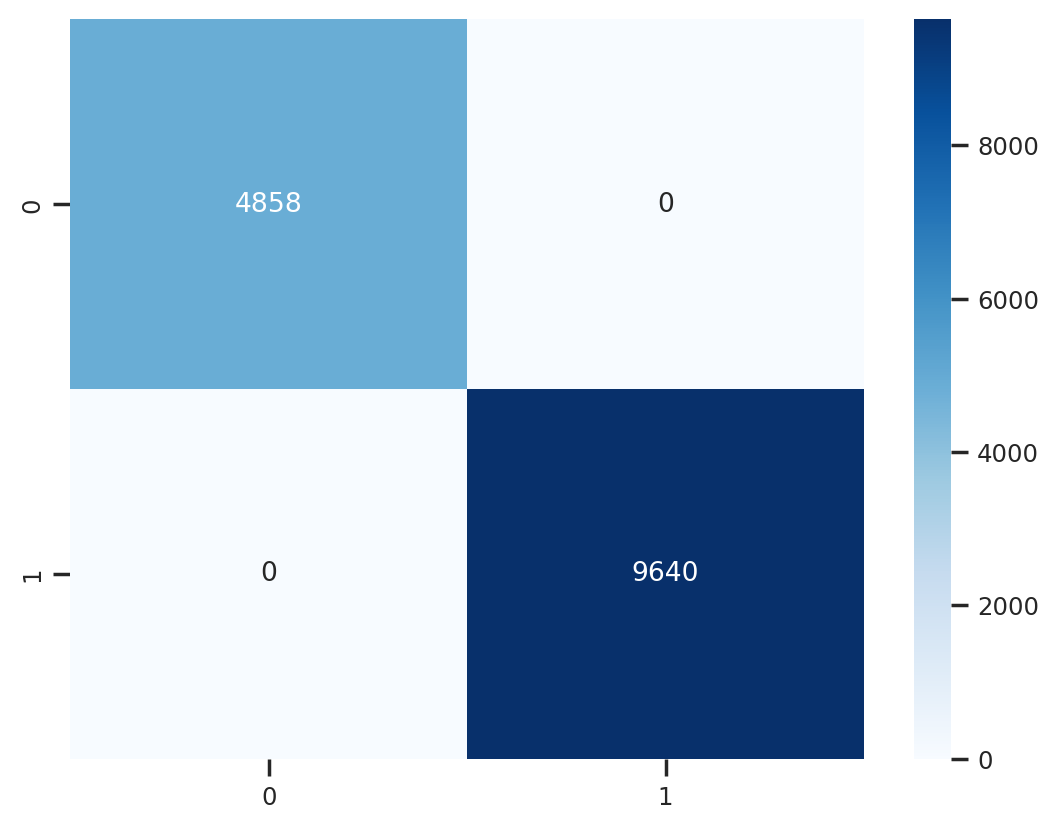

In [0]:
# Visualize the confusion matrix as a seaborn heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data = cm, annot=True, cmap="Blues", fmt="d")
plt.show()

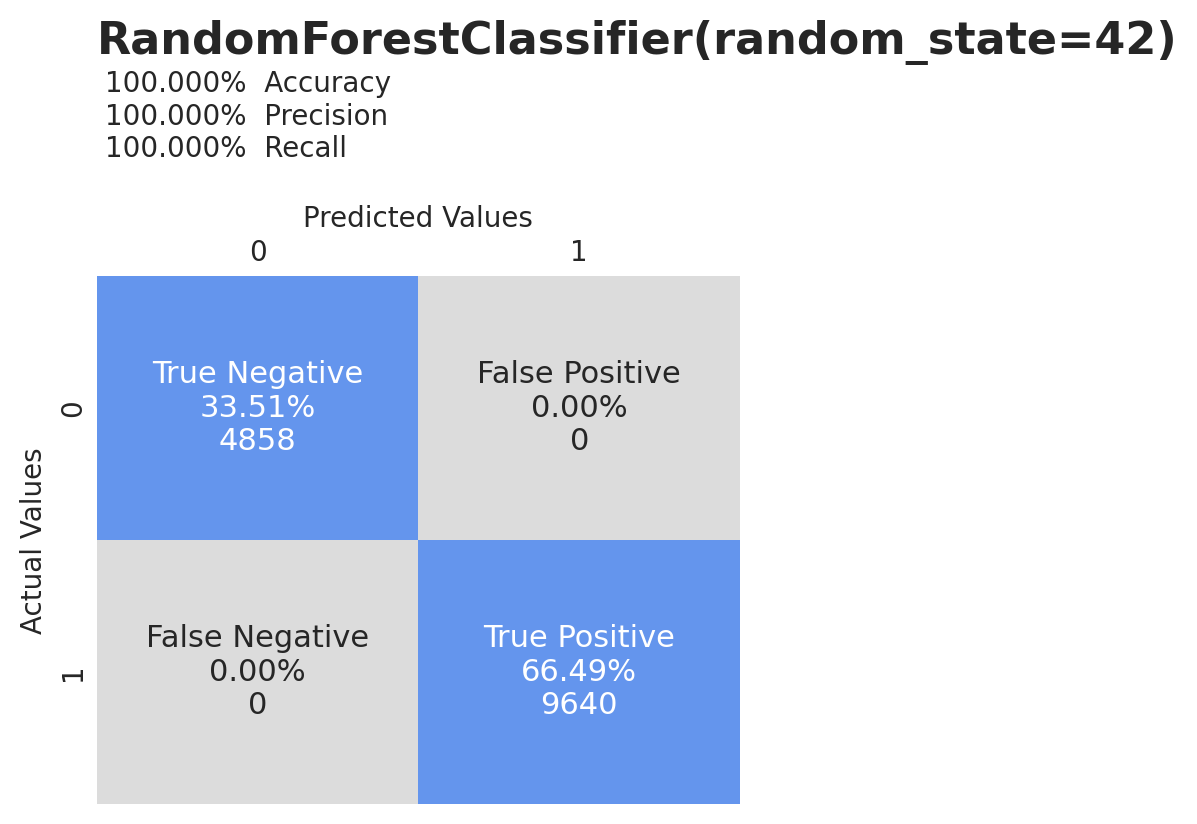

In [0]:
# Generate a better custom Confusion Matrix

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100

cm = confusion_matrix(y_test, y_pred)
# Normalize true, pred, or all
cm_norm = confusion_matrix(y_test, y_pred, normalize='all')
cm_colors = sns.color_palette(['gainsboro', 'cornflowerblue'])

# axis labels for the confusion matrix plot
cm_y_labels = ['0','1'] # column labels
cm_x_labels = ['0','1'] # row labels

# Confusion matrix labels
# Review and update to match the appropriate labels for your data set
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm_norm.flatten()]
group_labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_percentages, group_counts)]
group_labels = np.asarray(group_labels).reshape(2,2)

# Begin plot setup
fig, ax = plt.subplots(figsize=(4.2, 4.2))

# Heatmap
sns.heatmap(np.eye(2), annot=group_labels, annot_kws={'size': 11}, fmt='',
            cmap=cm_colors, cbar=False,
            yticklabels=cm_y_labels, xticklabels=cm_x_labels, ax=ax)

# Axis elements
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=10, length=0)
ax.set_xlabel('Predicted Values', size=10)
ax.set_ylabel('Actual Values', size=10)

# Position group labels and set colors
for text_elt, group_label in zip(ax.texts, group_labels):
    ax.text(*text_elt.get_position(), '\n', color=text_elt.get_color(),
            ha='center', va='top')

# Title for each plot
# Adjust pad to provide room for the score report below title and above confusion matrix plot
plt.title(f'{model}', pad=80, loc='left', fontsize=16, fontweight='bold')

# Score reports beneath each title
# Adjust x and y to fit report
plt.figtext(0.21, 0.81, f'{accuracy:.3f}%  Accuracy\n{precision:.3f}%  Precision\n{recall:.3f}%  Recall', wrap=True, ha='left', fontsize=10)

# Disply the plot!
plt.tight_layout()
plt.subplots_adjust(left=0.2)
print('\n') # Add a blank line for improved spacing
plt.show()